## Import libraries

In [14]:
# the library versions this code employed is mentioned in comments, if something doesn't work change your package versions
# to these ones, especially sklearn

import pandas as pd # version 0.24.2
import numpy as np #version 1.16.4
import random
import matplotlib.pyplot as plt #matplotlib version 3.1.0
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns #version 0.9.0
from sklearn.model_selection import GridSearchCV
import pickle
import shap

In [15]:
import sklearn
print(sklearn.__version__) # this code works with sklearn 0.21.2
#i'm using 0.22.1 (it's working as well)

0.22.1


in rahil and sina's thesis there are several steps to divide the dataset (for instance the percentage of each mvoement and divide equally inside each class...); all these steps have been summarized in the following function. running Load datast it's returning X_train, y_train, X_test, y_test.
these are lists of 11 patients. each patient is a dataframe of (N, 90), with all 3 rounds and 90 features. N depends on the overall length of the experiment that is slightly different for each patient

In [16]:
from utils.load_data import load_dataset
X_train, y_train, X_test, y_test=load_dataset()
print("number of patient: ", len(X_train))

LOAD DATASETS

:
Subject1
Round1 (2887, 152)
Round2 (2775, 152)
round3 (2498, 152)
       MAV1      MAV2      MAV3      MAV4      MAV5      MAV6      MAV7  \
0  0.020667  0.009256  0.007302  0.010696  0.048411  0.015565  0.013566   
1  0.020849  0.013591  0.014533  0.067708  0.104390  0.021633  0.026315   
2  0.013649  0.086738  0.025212  0.034016  0.042743  0.039416  0.018589   
3  0.010048  0.005960  0.006307  0.043353  0.066057  0.012944  0.024288   
4  0.072935  0.026458  0.024038  0.086573  0.157180  0.052219  0.029555   

       MAV8      MAV9     MAV10  ...    SKEW3     SKEW4    SKEW5    SKEW6  \
0  0.019455  0.019438  0.020109  ... -0.76883 -0.025066  0.76225 -0.42704   
1  0.044802  0.076000  0.008759  ...  0.17702  0.163200  0.22069  0.14271   
2  0.047252  0.061444  0.012353  ... -0.19943 -0.151700 -1.06920  0.16618   
3  0.030835  0.047647  0.006491  ...  0.19418  0.007295  0.13828  0.37693   
4  0.027389  0.231640  0.062172  ... -0.49456 -0.141540  0.10471  0.28199   

   

In [17]:
n_estimators = 100;
random_seed = 0;
model=ExtraTreesClassifier(n_estimators=n_estimators, random_state=random_seed)
model.fit(X_train[0], y_train[0])
shap_explainer = shap.TreeExplainer(model)
shap_values = shap_explainer.shap_values(X_test[0])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


## EXTREMELY RANDOMIZED TREES

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
parameters = {'max_depth': [15,30,50,100],
             'random_state':[0]}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
gs = gs.fit(X_train[0], y_train[0])
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    #TEST ON YOUR TEST SET 
best_extratrees_model = gs.best_estimator_
y_pred = best_extratrees_model.predict(X_test[0])
print(sklearn.metrics.accuracy_score(y_test[0], best_extratrees_model.predict(X_test[0])))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    4.9s remaining:   24.8s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:    4.9s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    4.9s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    5.2s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done   6 out of  12 | elapsed:    5.2s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    5.2s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    5.3s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    5.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    5.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.9s remaining: 

## SVM
### patient 1

subject 1 accuracy: 93.7822262663027


Text(0.5, 15.0, 'Predicted Label')

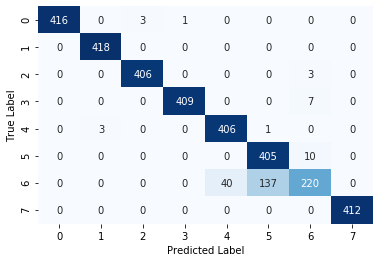

In [19]:
svm_model = SVC(kernel='linear',C=1, class_weight="balanced",gamma = 'auto', probability=True)
svm_model.fit(X_train[0], y_train[0])
y_pred = svm_model.predict(X_test[0])
    
    # save the model to disk
#     filename = 'SVM_'+f_name+'_s'+str(s+1)+'.sav'
#     pickle.dump(model, open(filename, 'wb'))
    
SVM_acc = metrics.accuracy_score(y_test[0], y_pred)
print("subject 1 accuracy:",SVM_acc*100)
sns.heatmap(confusion_matrix(y_test[0], y_pred), annot=True, fmt='d', cmap="Blues", cbar=False);
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

## KNN
### Patient 1

subject 1 accuracy:  96.54231119199272


Text(0.5, 15.0, 'Predicted Label')

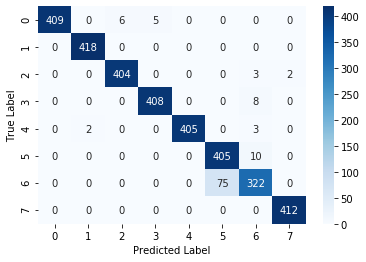

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=40)#,weights='distance')
knn_model.fit(X_train[0],y_train[0])
y_pred = knn_model.predict(X_test[0])
knn_acc=metrics.accuracy_score(y_test[0], y_pred)
print("subject 1 accuracy: ", knn_acc*100)
sns.heatmap(confusion_matrix(y_test[0], y_pred), annot=True, fmt='d', cmap="Blues"); 
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

## NAIVE BAYES
### Patient 1

subject 1 accuracy:  92.53867151956324


Text(0.5, 15.0, 'Predicted Label')

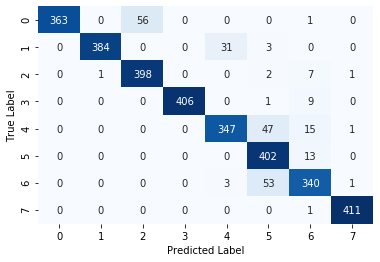

In [21]:
NaiveBayes_model = GaussianNB(var_smoothing=0.1)

NaiveBayes_model.fit(X_train[0], y_train[0])
y_pred=NaiveBayes_model.predict(X_test[0])
NB_acc= metrics.accuracy_score(y_test[0], y_pred)
print("subject 1 accuracy: ", NB_acc*100)
sns.heatmap(confusion_matrix(y_test[0], y_pred), annot=True, fmt='d', cmap="Blues", cbar=False);
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

## LDA
### Patient 1

subject 1 accuracy:  96.08735213830755


Text(0.5, 15.0, 'Predicted Label')

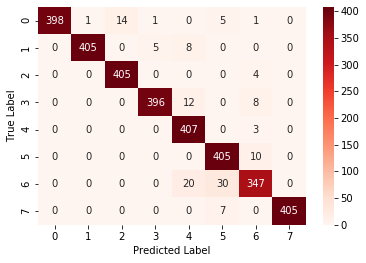

In [22]:
LDA_model = LinearDiscriminantAnalysis(solver='svd')
LDA_model.fit(X_train[0], y_train[0])
    
#     # save the model to disk
#     filename = 'LDA_'+f_name+'_s'+str(s+1)+'.sav'
#     pickle.dump(LDA, open(filename, 'wb'))
y_pred = LDA_model.predict(X_test[0])
LDA_acc = metrics.accuracy_score(y_test[0], y_pred)
print("subject 1 accuracy: ", LDA_acc*100)
sns.heatmap(confusion_matrix(y_test[0], y_pred), annot=True, fmt='d', cmap="Reds");
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# SHAP

In [13]:
shap.initjs()

In [14]:
X_train[0]

,MAV1,MAV2,MAV3,MAV4,MAV5,MAV6,MAV7,MAV8,MAV9,MAV10,...,IEMG1,IEMG2,IEMG3,IEMG4,IEMG5,IEMG6,IEMG7,IEMG8,IEMG9,IEMG10
1065,-0.464010,-0.466954,-0.426590,-0.120132,0.036943,-0.790898,0.118153,-0.197394,-0.274546,-0.839948,...,-0.464009,-0.466962,-0.426587,-0.120102,0.036964,-0.790909,0.118213,-0.197376,-0.274563,-0.839945
2684,-1.016182,-0.668919,-0.564850,0.034837,-0.316146,-1.010414,-1.148187,0.306499,-0.439676,-1.015128,...,-1.016180,-0.668921,-0.564850,0.034816,-0.316160,-1.010414,-1.148181,0.306516,-0.439677,-1.015124
48,-0.280218,-0.534415,-0.559118,-1.010120,-0.415927,-0.760434,0.194399,-1.137242,-0.882160,-0.538896,...,-0.280221,-0.534416,-0.559107,-1.010117,-0.415930,-0.760447,0.194422,-1.137248,-0.882158,-0.538905
2020,0.047177,-0.581248,-0.701320,-1.081720,-0.785735,-0.939945,-0.631324,-1.232334,-0.984192,-0.170804,...,0.047155,-0.581245,-0.701317,-1.081723,-0.785753,-0.939936,-0.631339,-1.232331,-0.984198,-0.170764
914,1.510452,-0.411424,-0.207236,-0.080500,0.317483,-0.231102,0.420899,-0.728604,0.296060,1.143851,...,1.510427,-0.411419,-0.207237,-0.080491,0.317460,-0.231127,0.420923,-0.728585,0.296018,1.143843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,1.911401,-0.186845,0.489405,1.016624,1.832501,0.420460,0.794327,-0.445534,2.152693,1.770456,...,1.911420,-0.186819,0.489385,1.016606,1.832424,0.420465,0.794343,-0.445483,2.152594,1.770477
7,-0.253819,-0.514985,-0.586470,-1.001389,-0.481406,-0.783561,-0.119669,-1.145009,-0.874114,-0.592490,...,-0.253867,-0.514984,-0.586465,-1.001388,-0.481400,-0.783583,-0.119669,-1.145013,-0.874113,-0.592510
3905,-0.783992,-0.631112,-0.561205,0.237128,-0.390816,-0.691588,0.025916,0.802232,-0.169859,-0.847477,...,-0.783989,-0.631111,-0.561210,0.237150,-0.390821,-0.691604,0.025889,0.802245,-0.169859,-0.847479
1020,-0.611119,-0.435909,-0.243683,0.324055,0.137665,-0.772578,0.637996,0.572403,-0.280542,-0.783983,...,-0.611114,-0.435900,-0.243720,0.324018,0.137672,-0.772565,0.637929,0.572408,-0.280526,-0.783977


In [24]:
%%time
import shap
shap_explainer=shap.TreeExplainer(best_extratrees_model)
shap_values_trees = shap_explainer.shap_values(X_test[0])

Wall time: 1min 22s


In [ ]:
#import shap
#shap_explainer=shap.TreeExplainer(best_randomforest_model, X_train[0], feature_perturbation="interventional", model_output="log_loss")
#shap_values = shap_explainer.shap_values(X_train[0] ,  y_train[0])

In [14]:
%time
(shap_values[0].shape)
path_shap="C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\images\\result_shap\\"
path_img1=path_shap+"ciao.png"

Wall time: 0 ns


In [ ]:
%%time
import shap
shap_explainer=shap.KernelExplainer(svm_model.predict, X_train[0].iloc[0:1000,:])
shap_values_SVM = shap_explainer.shap_values(X_test[0])
#explainer = shap.KernelExplainer(svm_model.predict_proba, X_train_10.iloc[0:10000,:])

In [33]:
explainer=shap.SamplingExplainer(svm_model.predict_proba, X_train[0].iloc[0:1000,:])
shap_values = explainer.shap_values(X_test[0])

In [34]:
import pickle
    with open('C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_patient_0_SVM.pkl', 'wb') as f:
        pickle.dump(shap_values, f)

## SHAP FEATURES IMPORTANCE PER CLASS
The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data --> BARPLOT
Each point on the summary plot DOT is a Shapley value for a feature and an instance.
The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.The color represents the value of the feature from low to high.
Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature.

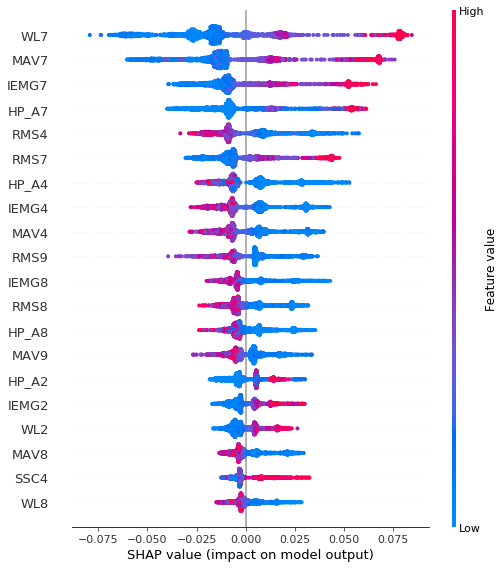

In [21]:
shap.summary_plot(shap_values[0], X_test[1], plot_type="dot", title="class 0", show=False)
plt.savefig(path_img1)

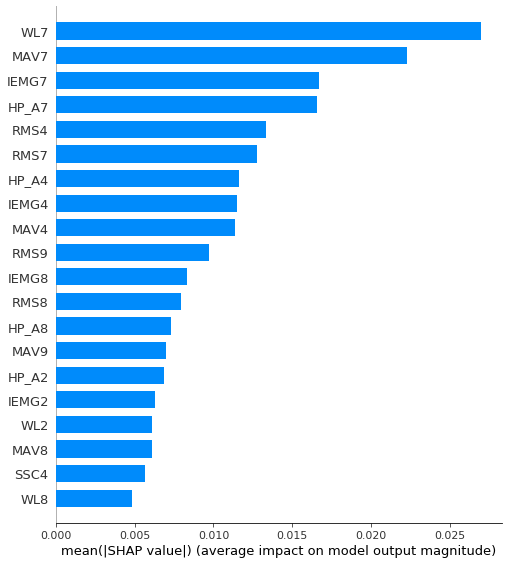

In [19]:
shap.summary_plot(shap_values[0], X_test[1], plot_type="bar", title="class 0", show=False)
plt.savefig('ex1_2.png')

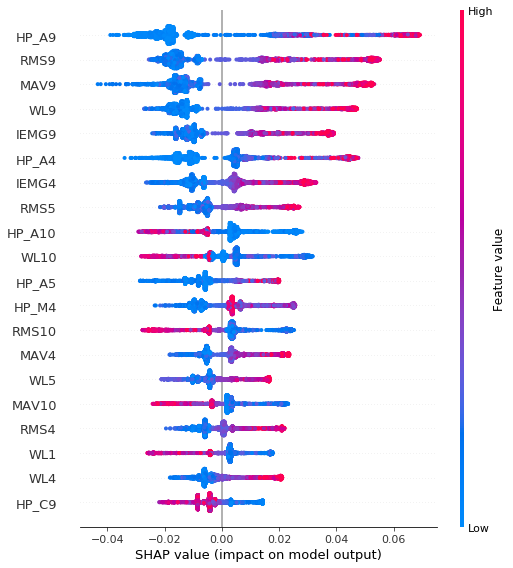

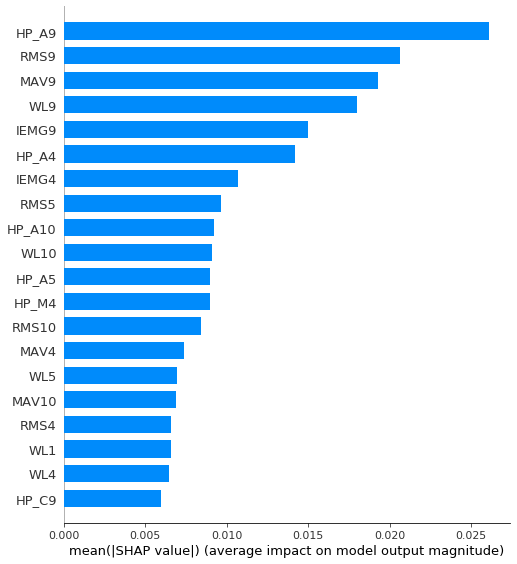

In [64]:
shap.summary_plot(shap_values[1], X_test[0], plot_type="dot", title="class 1")
shap.summary_plot(shap_values[1], X_train[0], plot_type="bar", title="class 1")

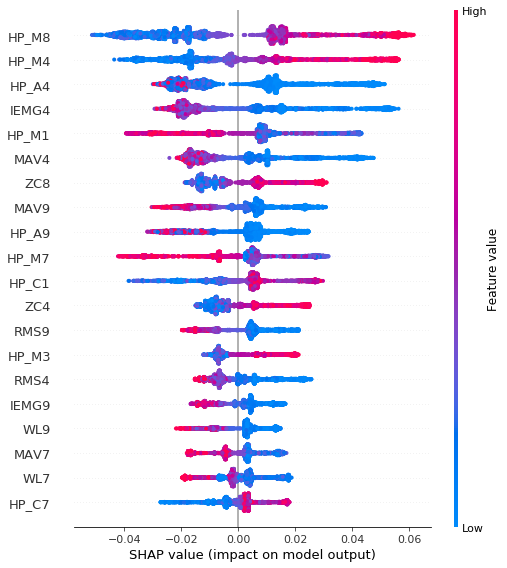

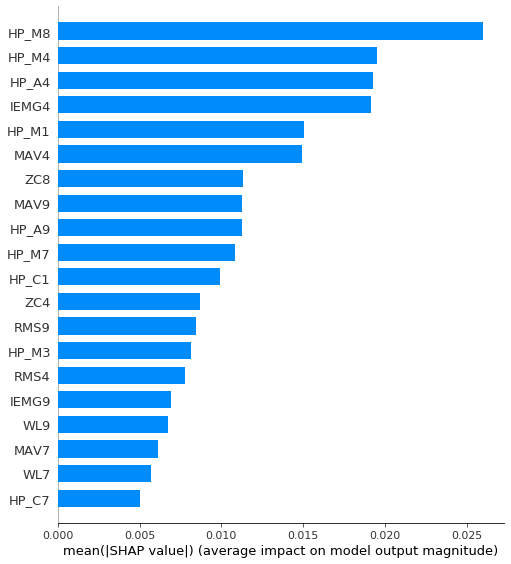

In [65]:
shap.summary_plot(shap_values[2], X_train[0], plot_type="dot")
shap.summary_plot(shap_values[2], X_train[0], plot_type="bar")

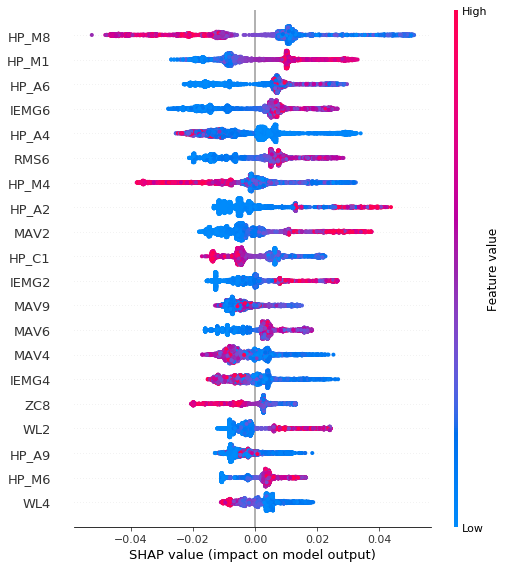

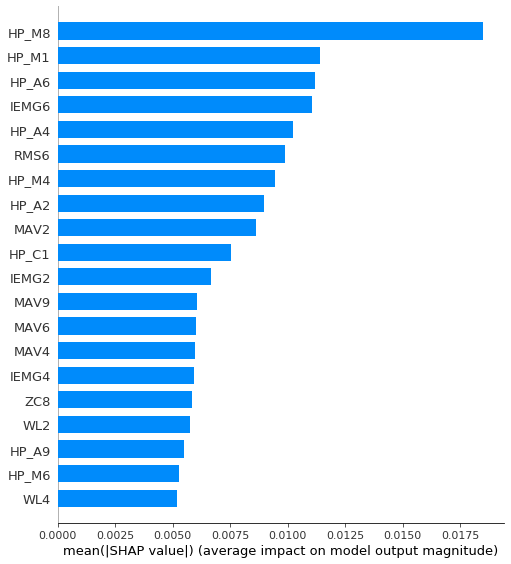

In [66]:
shap.summary_plot(shap_values[3], X_train[0], plot_type="dot")
shap.summary_plot(shap_values[3], X_train[0], plot_type="bar")

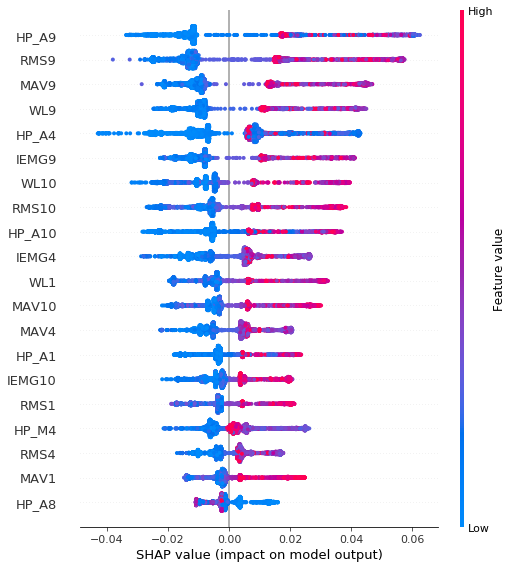

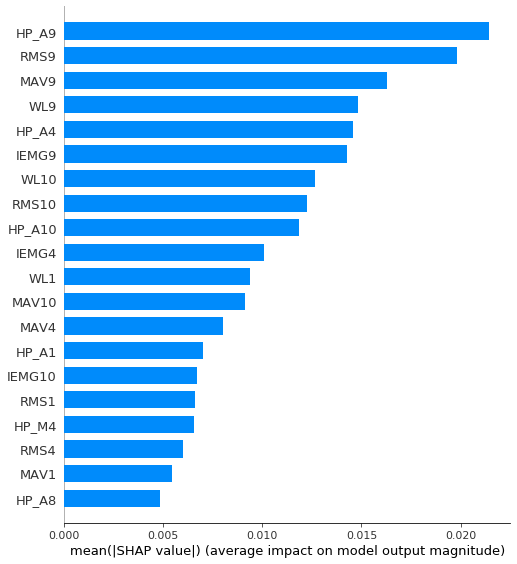

In [67]:
shap.summary_plot(shap_values[4], X_train[0], plot_type="dot")
shap.summary_plot(shap_values[4], X_train[0], plot_type="bar")

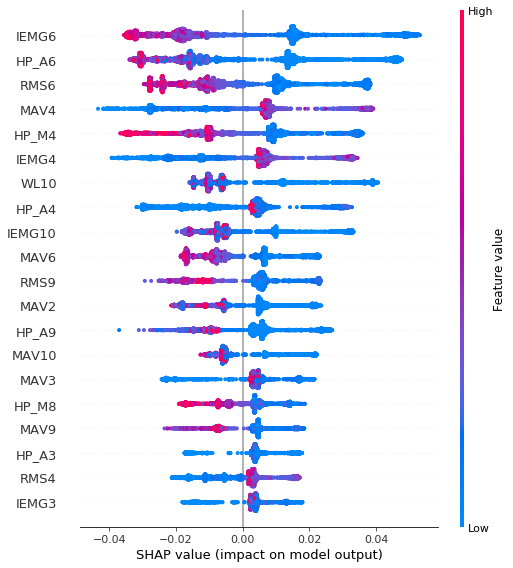

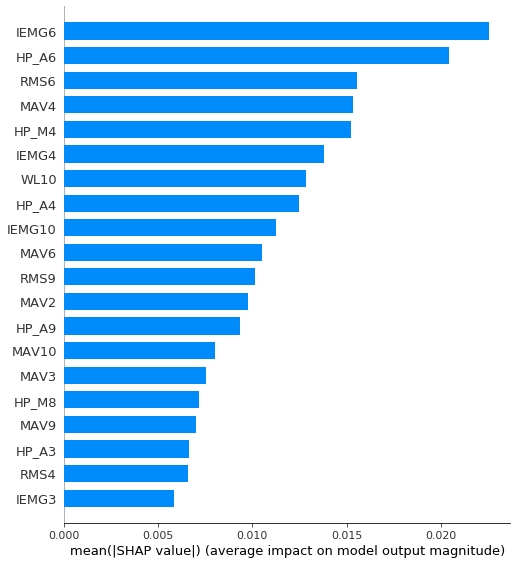

In [68]:
shap.summary_plot(shap_values[5], X_train[0], plot_type="dot")
shap.summary_plot(shap_values[5], X_train[0], plot_type="bar")

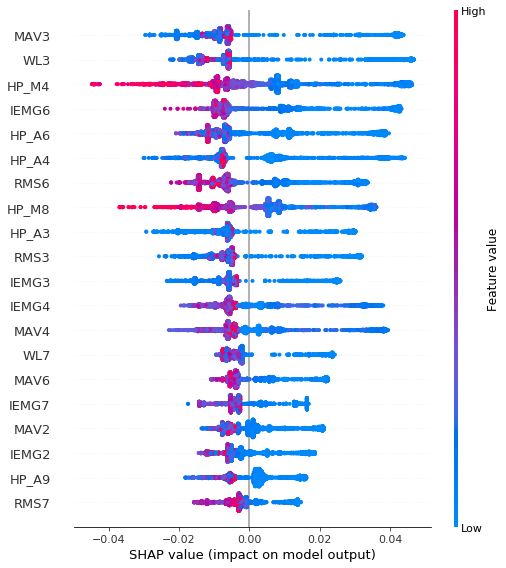

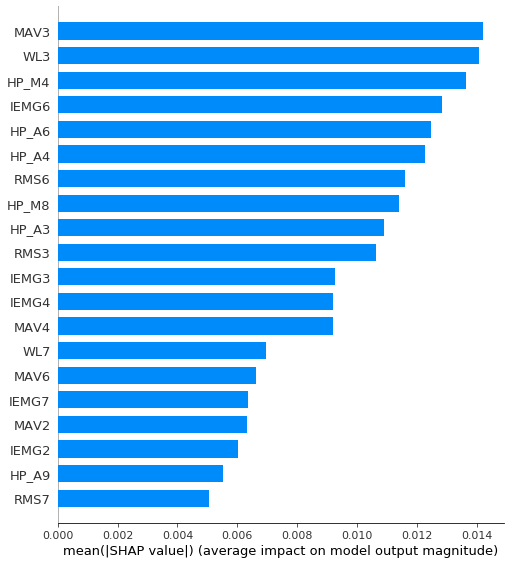

In [69]:
shap.summary_plot(shap_values[6], X_train[0], plot_type="dot")
shap.summary_plot(shap_values[6], X_train[0], plot_type="bar")

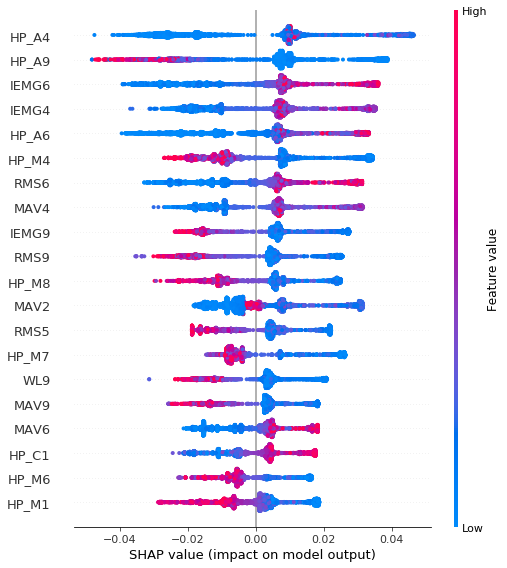

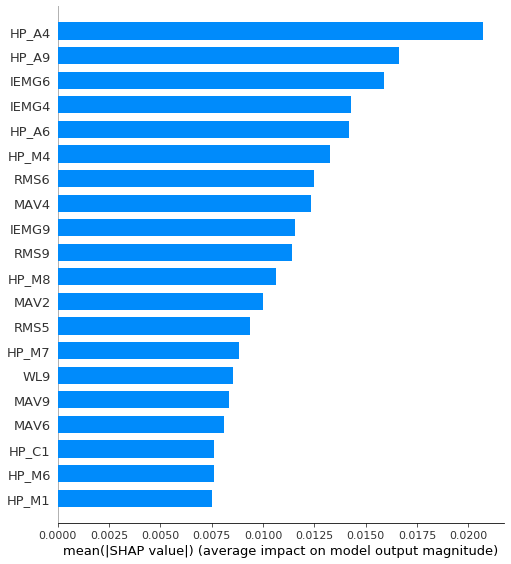

In [70]:
shap.summary_plot(shap_values[7], X_train[0], plot_type="dot")
shap.summary_plot(shap_values[7], X_train[0], plot_type="bar")

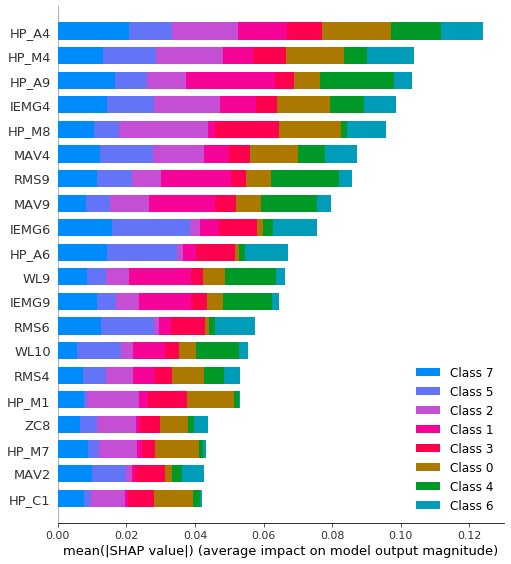

In [71]:
shap.summary_plot(shap_values, X_train[0])

In [ ]:
shap.force_plot(shap_explainer.expected_value[1], shap_values[0], X_train[0])

### KERNEL explainer

In [135]:
# explain all the predictions in the test set

(75414, 90)


In [ ]:
#explainer = shap.KernelExplainer(svm_model.predict_proba, X_train_10.iloc[0:10000,:])

In [150]:
#explainer=shap.SamplingExplainer(svm_model.predict_proba, X_train_10)
#shap_values = explainer.shap_values(X_test_11[:1000])

In [158]:
#import pickle
#with open('C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_patient_11_1000instance.pkl', 'wb') as f:
#    pickle.dump(shap_values, f)

In [160]:
with open('C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_patient_11_1000instance.pkl', 'rb') as f:
    shap_values = pickle.load(f)

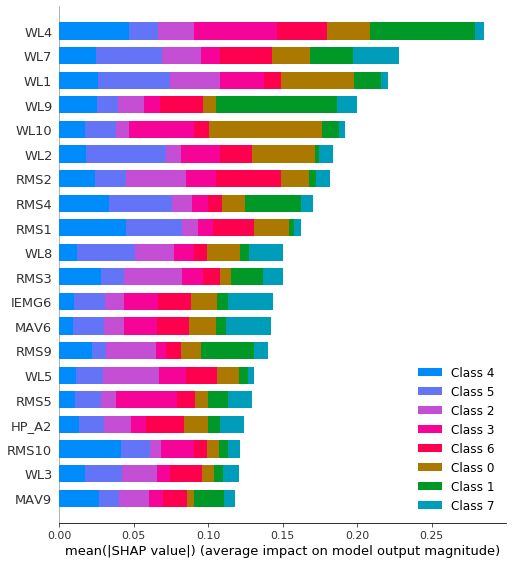

In [161]:
shap.summary_plot(shap_values, X_test_11[:1000])

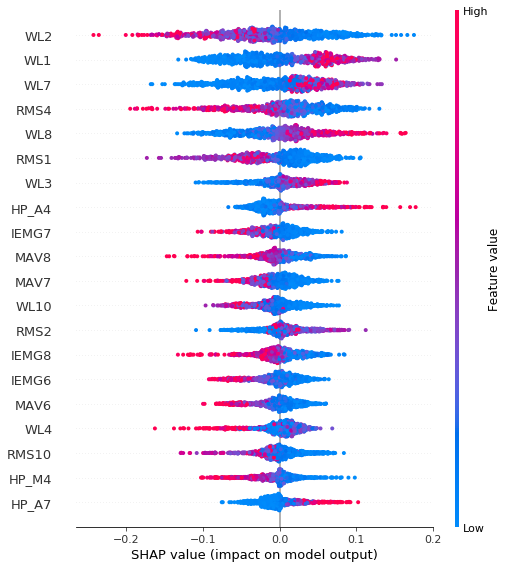

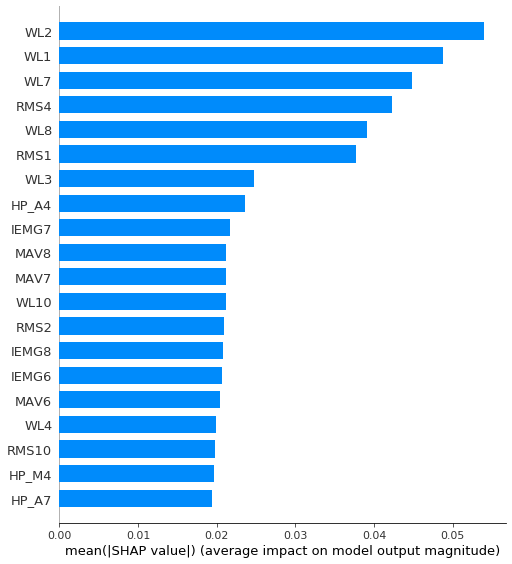

In [163]:
shap.summary_plot(shap_values[5], X_test_11[:1000])
shap.summary_plot(shap_values[5], X_test_11[:1000], plot_type="bar")

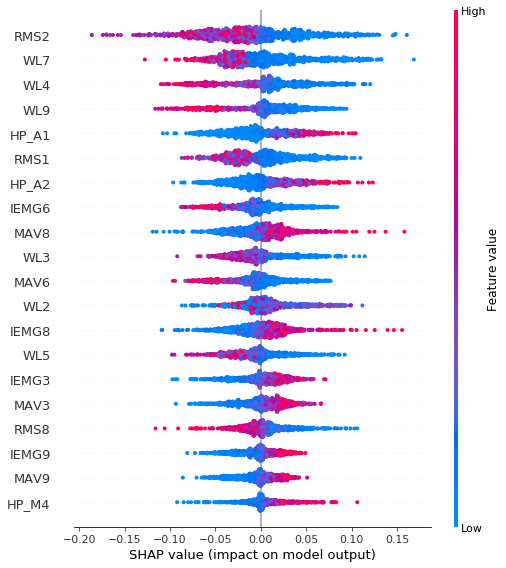

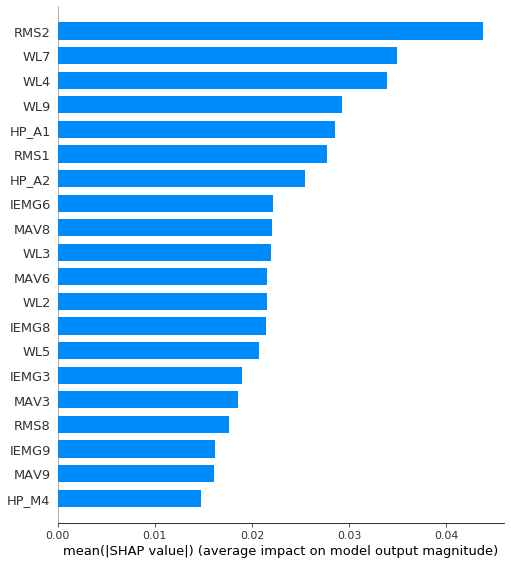

In [164]:
shap.summary_plot(shap_values[6], X_test_11[:1000])
shap.summary_plot(shap_values[6], X_test_11[:1000], plot_type="bar")

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_T.iloc[0:50])

In [ ]:
shap.summary_plot(shap_values, X_train[0])

In [ ]:
# # grid search for SVM
# SVC_acc=[0]*N_Subj
# classifier = SVC()
# parameters = {"kernel":['linear'], "C":[1,10,100,1000],"gamma":[1e-4]} 
# for s in range(0,N_Subj):
#     gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
#     gs = gs.fit(X_train[s], y_train[s])
#     #summarize the results of your GRIDSEARCH
#     print('***GRIDSEARCH RESULTS***')
#     print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test[s])
#     SVC_acc[s] = metrics.accuracy_score(y_test[s], y_pred)
#     print("subject",s+1,"accuracy",SVC_acc[s])
# print(SVC_acc[s])

In [ ]:
# print(classification_report(y_test[s], y_pred))

In [ ]:
# # grid search for NB
# NB = GaussianNB()
# l1=[0.125, 0.125,0.125,0.125,0.125, 0.125,0.125,0.125]
# parameters = {'priors':[l1,None]}

# NB_acc=[0]*N_Subj
# for s in range(0,N_Subj): 
#     gs = GridSearchCV(NB, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
#     gs = gs.fit(X_train[s], y_train[s])

#     print('***GRIDSEARCH RESULTS***')
#     print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test[s])
#     NB_acc[s] = metrics.accuracy_score(y_test[s], y_pred)
#     print("subject",s+1,"accuracy: ", NB_acc[s])
# print(NB_acc)

In [ ]:
# # grid search for LDA
# LDA = LinearDiscriminantAnalysis()
# parameters = {'solver':['svd','lsqr']}
# LDA_acc=[0]*N_Subj

# for s in range(0,N_Subj):
#     gs = GridSearchCV(LDA, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)
#     gs = gs.fit(X_train[s], y_train[s])

#     print('***GRIDSEARCH RESULTS***')
#     print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))

#     best_model = gs.best_estimator_
#     y_pred = best_model.predict(X_test[s])
#     LDA_acc[s] = metrics.accuracy_score(y_test[s], y_pred)
#     print("subject",s+1,"accuracy: ", LDA_acc[s])
# print(LDA_acc)